In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression

In [2]:
def calculate_mean(readings):
    readings_total = sum(readings)
    number_of_readings = len(readings)
    mean = readings_total / float(number_of_readings)
    return mean

In [3]:
def calculate_variance(readings):
    readings_mean = calculate_mean(readings)
    mean_difference_squared_readings = [pow((reading - readings_mean), 2) for reading in readings]
    variance = sum(mean_difference_squared_readings)
    return variance / float(len(readings) - 1)

In [4]:
def calculate_covariance(readings_1, readings_2):
    readings_1_mean = calculate_mean(readings_1)
    readings_2_mean = calculate_mean(readings_2)
    readings_size = len(readings_1)
    covariance = 0
    for i in range(0, readings_size):
        covariance += (readings_1[i] - readings_1_mean) * (readings_2[i] - readings_2_mean)
    return covariance / float(readings_size - 1)

In [5]:
def calculate_linear_regression_coefficients(x_readings, y_readings):
    b1 = calculate_covariance(x_readings, y_readings) / float(calculate_variance(x_readings))
    b0 = calculate_mean(y_readings) - (b1 * calculate_mean(x_readings))
    return b0, b1

In [6]:
def predict_target_value(x, b0, b1):
    return b0 + b1 * x

In [7]:
def draw(x1,x2):
    ln=plt.plot(x1,x2)

In [8]:
def simple_linear_regression(X,y):
    b0,b1 = calculate_linear_regression_coefficients(X,y)
    print(b0,b1)
    draw(X,b0 + b1 * X)

In [9]:
X = np.array([10,9,2,15,10,16,11,16])
y = np.array([95,80,10,50,45,98,38,93])

12.584627964022893 4.58789860997547


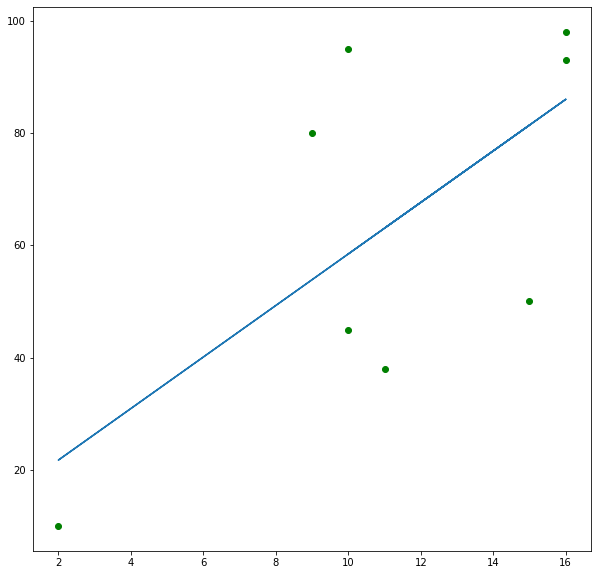

In [10]:
_,ax=plt.subplots(figsize=(10,10))
ax.scatter(X,y,color='g')
simple_linear_regression(X,y)
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
x_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
reg = LinearRegression()
reg.fit(x_df, y_df)

LinearRegression()

In [12]:
reg.coef_

array([[4.58789861]])

In [13]:
reg.intercept_

array([12.58462796])

In [17]:
b0,b1 = calculate_linear_regression_coefficients(X,y)
predict_target_value(3,b0,b1)

26.348323793949305

In [18]:
predict_target_value(3,reg.intercept_,reg.coef_)

array([[26.34832379]])

In [19]:
x_test = pd.DataFrame(np.array([3]))
reg.predict(x_test)

array([[26.34832379]])